**Airline Delay and Cancellation Analysis (2009-2018)**

This project aims to analyze a comprehensive dataset of airline delays and cancellations spanning from 2009 to 2018. We will explore various factors contributing to flight disruptions, identify patterns across years, and potentially build predictive models to enhance understanding and operational efficiency within the aviation industry.

Project Goal:

The primary goal of this project is to gain actionable insights from historical flight data to understand the root causes of delays and cancellations over a decade. By doing so, we aim to provide valuable information for airlines to improve their on-time performance, for airports to optimize operations, and for passengers to make informed travel decisions. Ultimately, we seek to develop a robust data analysis and machine learning pipeline that showcases advanced data science techniques, handling multi-file datasets effectively.

_______

#1. Environment Setup and Data Loading

This initial section sets up our Python environment by importing necessary libraries and loading the raw flight data from multiple yearly CSV files into a single, combined Pandas DataFrame.

    Simple Explanation

To manage the large dataset spread across multiple yearly files, we'll first import essential Python libraries like Pandas for data manipulation and NumPy for numerical operations. We'll then iterate through each year's file (from 2009 to 2018), load it individually, and combine all these yearly datasets into one large, unified DataFrame. This is crucial for analyzing trends and patterns over the entire decade.


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import os

# Define the path to your data folder on Google Drive
data_folder_path = '/content/drive/MyDrive/Airline_data'

# Define the specific columns to use for analysis
columns_to_use = [
    'FL_DATE', 'OP_CARRIER', 'DEP_DELAY', 'ARR_DELAY',
    'CANCELLED', 'DIVERTED'
]

# A list to hold the summary results for each year
yearly_results = []

# Define the years to analyze
start_year = 2009
end_year = 2018

print("Setup complete. Ready to begin analysis.")

Setup complete. Ready to begin analysis.


___

In [11]:
print("Starting analysis on each file individually to save memory...")

# Loop through each year to read and analyze the corresponding CSV file
for year in range(start_year, end_year + 1):
    file_path = os.path.join(data_folder_path, f'{year}.csv')
    try:
        # Read the file with selected columns and a small data type optimization
        df_year = pd.read_csv(
            file_path,
            usecols=columns_to_use,
            dtype={'DEP_DELAY': 'float32', 'ARR_DELAY': 'float32', 'CANCELLED': 'float32', 'DIVERTED': 'float32'},
            engine='c'
        )

        # Perform analysis on the current file
        avg_dep_delay = df_year['DEP_DELAY'].mean()
        avg_arr_delay = df_year['ARR_DELAY'].mean()
        total_cancelled = df_year['CANCELLED'].sum()
        total_diverted = df_year['DIVERTED'].sum()
        num_flights = len(df_year)

        # Store the results in a dictionary
        yearly_results.append({
            'Year': year,
            'Number_of_Flights': num_flights,
            'Avg_Dep_Delay': avg_dep_delay,
            'Avg_Arr_Delay': avg_arr_delay,
            'Total_Cancelled': total_cancelled,
            'Total_Diverted': total_diverted
        })

        print(f"Successfully analyzed data for {year}. Results stored.")

    except FileNotFoundError:
        print(f"Warning: File {file_path} not found. Skipping this year.")
    except Exception as e:
        print(f"Unexpected error with file {file_path}: {e}")

Starting analysis on each file individually to save memory...
Successfully analyzed data for 2009. Results stored.
Successfully analyzed data for 2010. Results stored.
Successfully analyzed data for 2011. Results stored.
Successfully analyzed data for 2012. Results stored.
Successfully analyzed data for 2013. Results stored.
Successfully analyzed data for 2014. Results stored.
Successfully analyzed data for 2015. Results stored.
Successfully analyzed data for 2016. Results stored.
Successfully analyzed data for 2017. Results stored.
Successfully analyzed data for 2018. Results stored.


In [12]:
print("\nAnalysis complete! Here are the combined results:")

# Convert the list of results into a final, small DataFrame
final_results_df = pd.DataFrame(yearly_results)
print(final_results_df)


Analysis complete! Here are the combined results:
   Year  Number_of_Flights  Avg_Dep_Delay  Avg_Arr_Delay  Total_Cancelled  \
0  2009            6429338       7.598184       4.285593          87038.0   
1  2010            6450117       8.261323       4.102093         113255.0   
2  2011            6066650       8.463392       4.767229         116036.0   
3  2012            6096762       7.794122       3.155596          78862.0   
4  2013            6369482       9.745790       6.010872          96012.0   
5  2014            5819811      10.642131       7.328069         126984.0   
6  2015            5819079       9.370157       4.407059          89884.0   
7  2016            5617658       8.938005       3.519291          65861.0   
8  2017            5674621       9.725736       4.326362          82693.0   
9  2018            7213446       9.969856       5.048581         116584.0   

   Total_Diverted  
0         15323.0  
1         15474.0  
2         14404.0  
3         12519.0  
4

#2. Initial Data Inspection

Once the combined data is loaded, it's crucial to perform an initial inspection to understand its structure, content, and identify any immediate issues across the entire dataset.

Simple Explanation

Now that we have all the yearly data combined, it's time to take a quick look at the complete dataset. We'll check the first few rows, get a summary of data types, see how many non-null values each column has, and generate basic statistics. This comprehensive overview helps us understand the full scope of our data and pinpoint any problems (like missing values or incorrect data types) that need fixing before we proceed.


In [13]:
print("--- Initial Data Inspection for Final Results ---")

# 1. Display the entire DataFrame
print("\n1. Final Results DataFrame:")
print(final_results_df)

# 2. Display basic information about the DataFrame
print("\n2. DataFrame Info (Column types and non-null counts):")
final_results_df.info()

# 3. Display descriptive statistics for numerical columns
print("\n3. Descriptive Statistics for Numerical Columns:")
print(final_results_df.describe())

--- Initial Data Inspection for Final Results ---

1. Final Results DataFrame:
   Year  Number_of_Flights  Avg_Dep_Delay  Avg_Arr_Delay  Total_Cancelled  \
0  2009            6429338       7.598184       4.285593          87038.0   
1  2010            6450117       8.261323       4.102093         113255.0   
2  2011            6066650       8.463392       4.767229         116036.0   
3  2012            6096762       7.794122       3.155596          78862.0   
4  2013            6369482       9.745790       6.010872          96012.0   
5  2014            5819811      10.642131       7.328069         126984.0   
6  2015            5819079       9.370157       4.407059          89884.0   
7  2016            5617658       8.938005       3.519291          65861.0   
8  2017            5674621       9.725736       4.326362          82693.0   
9  2018            7213446       9.969856       5.048581         116584.0   

   Total_Diverted  
0         15323.0  
1         15474.0  
2         144

----

#3. Data Cleaning

Data cleaning is a critical phase where we address inconsistencies, missing values, and incorrect data types across the entire combined dataset to prepare it for accurate analysis.

Simple Explanation

Now that all our yearly data is together, we'll clean it thoroughly. This involves handling missing values by either filling them in (e.g., assuming a zero delay if no delay is recorded) or removing rows/columns that are too incomplete. We'll also ensure that all columns, especially dates and numerical values, have the correct data types. This rigorous cleaning process is vital to avoid errors in our analysis and ensure the reliability of our insights


In [14]:
print("Checking for missing values in the final DataFrame:")
print(final_results_df.isnull().sum())

Checking for missing values in the final DataFrame:
Year                 0
Number_of_Flights    0
Avg_Dep_Delay        0
Avg_Arr_Delay        0
Total_Cancelled      0
Total_Diverted       0
dtype: int64


---

#4. Exploratory Data Analysis (EDA)

Exploratory Data Analysis is a crucial phase where we begin to uncover patterns, insights, and relationships within our cleaned dataset. Using a combination of statistical summaries and visualizations, we'll identify key factors contributing to delays and cancellations, and validate our initial assumptions about the data.

Simple Explanation:

Now that our data is clean and ready, we will create various charts and graphs to understand it better. We'll visualize things like the average delay for different airlines, see which months or days of the week have the most cancellations, and find the busiest airports. This step helps us discover important trends and stories hidden in the numbers.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set a style for the plots to make them look better
sns.set_style("whitegrid")

/tmp/ipython-input-1227666237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Avg_Arr_Delay', data=final_results_df, palette='viridis')


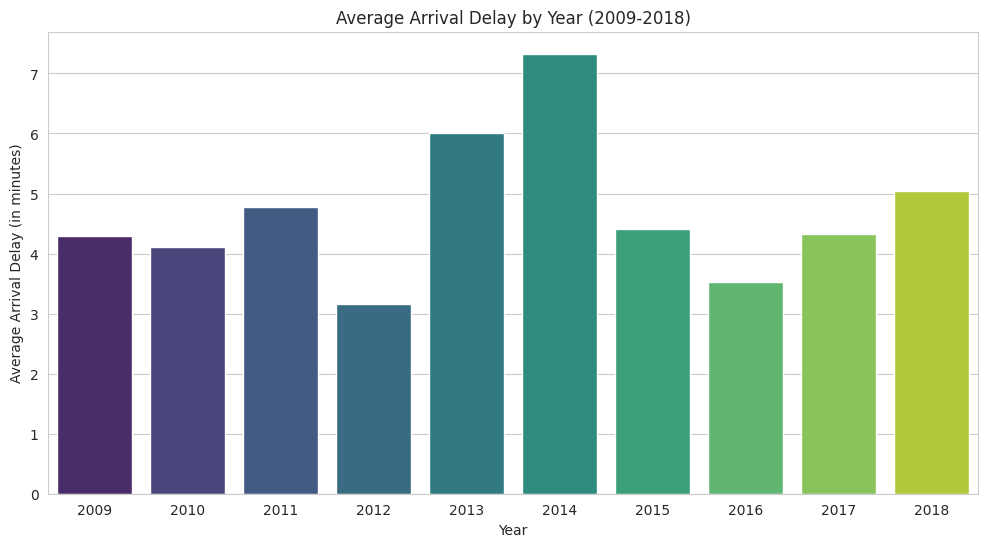

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Avg_Arr_Delay', data=final_results_df, palette='viridis')
plt.title('Average Arrival Delay by Year (2009-2018)')
plt.xlabel('Year')
plt.ylabel('Average Arrival Delay (in minutes)')
plt.show()

/tmp/ipython-input-3782629873.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Total_Cancelled', data=final_results_df, palette='plasma')


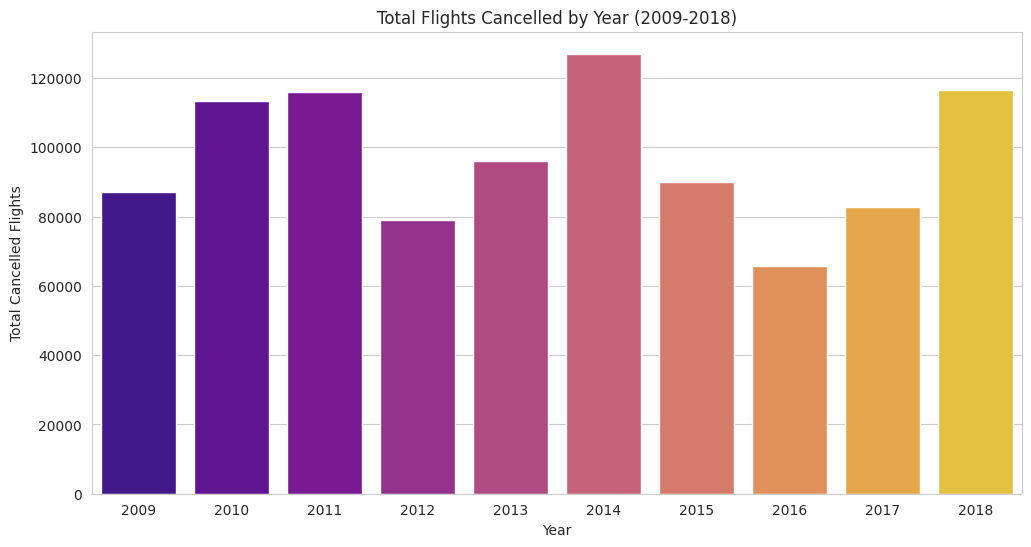

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Total_Cancelled', data=final_results_df, palette='plasma')
plt.title('Total Flights Cancelled by Year (2009-2018)')
plt.xlabel('Year')
plt.ylabel('Total Cancelled Flights')
plt.show()

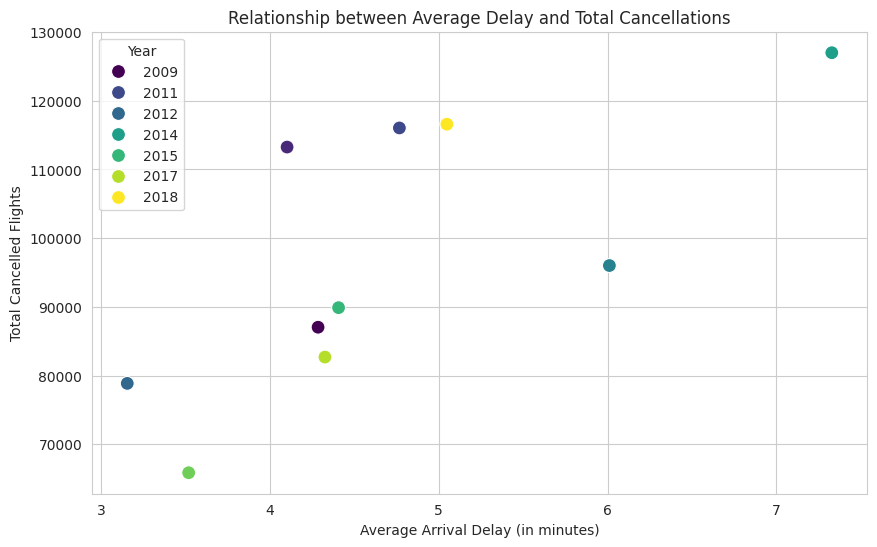

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Arr_Delay', y='Total_Cancelled', data=final_results_df, hue='Year', palette='viridis', s=100)
plt.title('Relationship between Average Delay and Total Cancellations')
plt.xlabel('Average Arrival Delay (in minutes)')
plt.ylabel('Total Cancelled Flights')
plt.show()

In [20]:
import pandas as pd
import os

# Define the path to your data folder on Google Drive
data_folder_path = '/content/drive/MyDrive/Airline_data'

# Define the specific columns to use for analysis
columns_to_use = [
    'OP_CARRIER', 'DEP_DELAY', 'ARR_DELAY',
    'CANCELLED', 'DIVERTED'
]

# A dictionary to hold the results for each airline
airline_results = {}
CHUNKSIZE = 100000

print("Starting memory-efficient analysis for airline performance...")

start_year = 2009
end_year = 2018

# Loop through each year
for year in range(start_year, end_year + 1):
    file_path = os.path.join(data_folder_path, f'{year}.csv')

    try:
        # Use a chunked reader
        chunk_reader = pd.read_csv(
            file_path,
            usecols=columns_to_use,
            dtype={'DEP_DELAY': 'float32', 'ARR_DELAY': 'float32', 'CANCELLED': 'float32', 'DIVERTED': 'float32'},
            engine='c',
            chunksize=CHUNKSIZE
        )

        # Loop through each chunk and process it
        for chunk in chunk_reader:
            # Group by OP_CARRIER within the chunk
            grouped_chunk = chunk.groupby('OP_CARRIER').agg(
                number_of_flights=('OP_CARRIER', 'count'),
                avg_dep_delay_sum=('DEP_DELAY', 'sum'),
                avg_arr_delay_sum=('ARR_DELAY', 'sum'),
                total_cancelled=('CANCELLED', 'sum'),
                total_diverted=('DIVERTED', 'sum')
            )

            # Update the airline_results dictionary with the chunk's results
            for airline, row in grouped_chunk.iterrows():
                if airline not in airline_results:
                    airline_results[airline] = {
                        'number_of_flights': 0,
                        'avg_dep_delay_sum': 0,
                        'avg_arr_delay_sum': 0,
                        'total_cancelled': 0,
                        'total_diverted': 0
                    }
                airline_results[airline]['number_of_flights'] += row['number_of_flights']
                airline_results[airline]['avg_dep_delay_sum'] += row['avg_dep_delay_sum']
                airline_results[airline]['avg_arr_delay_sum'] += row['avg_arr_delay_sum']
                airline_results[airline]['total_cancelled'] += row['total_cancelled']
                airline_results[airline]['total_diverted'] += row['total_diverted']

        print(f"Successfully processed data for {year}.")

    except FileNotFoundError:
        print(f"Warning: File {file_path} not found. Skipping this year.")
    except Exception as e:
        print(f"Unexpected error with file {file_path}: {e}")

# Convert the dictionary into a final DataFrame
airline_results_df = pd.DataFrame.from_dict(airline_results, orient='index')

# Calculate the final averages
airline_results_df['avg_dep_delay'] = airline_results_df['avg_dep_delay_sum'] / airline_results_df['number_of_flights']
airline_results_df['avg_arr_delay'] = airline_results_df['avg_arr_delay_sum'] / airline_results_df['number_of_flights']

# Drop the temporary sum columns
airline_results_df = airline_results_df.drop(columns=['avg_dep_delay_sum', 'avg_arr_delay_sum'])
airline_results_df = airline_results_df.reset_index().rename(columns={'index': 'op_carrier'})

print("\nAnalysis complete! Here are the airline performance results:")
print(airline_results_df.head())

Starting memory-efficient analysis for airline performance...
Successfully processed data for 2009.
Successfully processed data for 2010.
Successfully processed data for 2011.
Successfully processed data for 2012.
Successfully processed data for 2013.
Successfully processed data for 2014.
Successfully processed data for 2015.
Successfully processed data for 2016.
Successfully processed data for 2017.
Successfully processed data for 2018.

Analysis complete! Here are the airline performance results:
  op_carrier  number_of_flights  total_cancelled  total_diverted  \
0         9E          1066251.0          25797.0          2678.0   
1         AA          6682161.0         108555.0         20087.0   
2         AS          1660539.0          10796.0          4385.0   
3         B6          2483969.0          43906.0          6330.0   
4         CO           740498.0           6142.0          1984.0   

   avg_dep_delay  avg_arr_delay  
0       7.006714       2.941744  
1       9.376039   

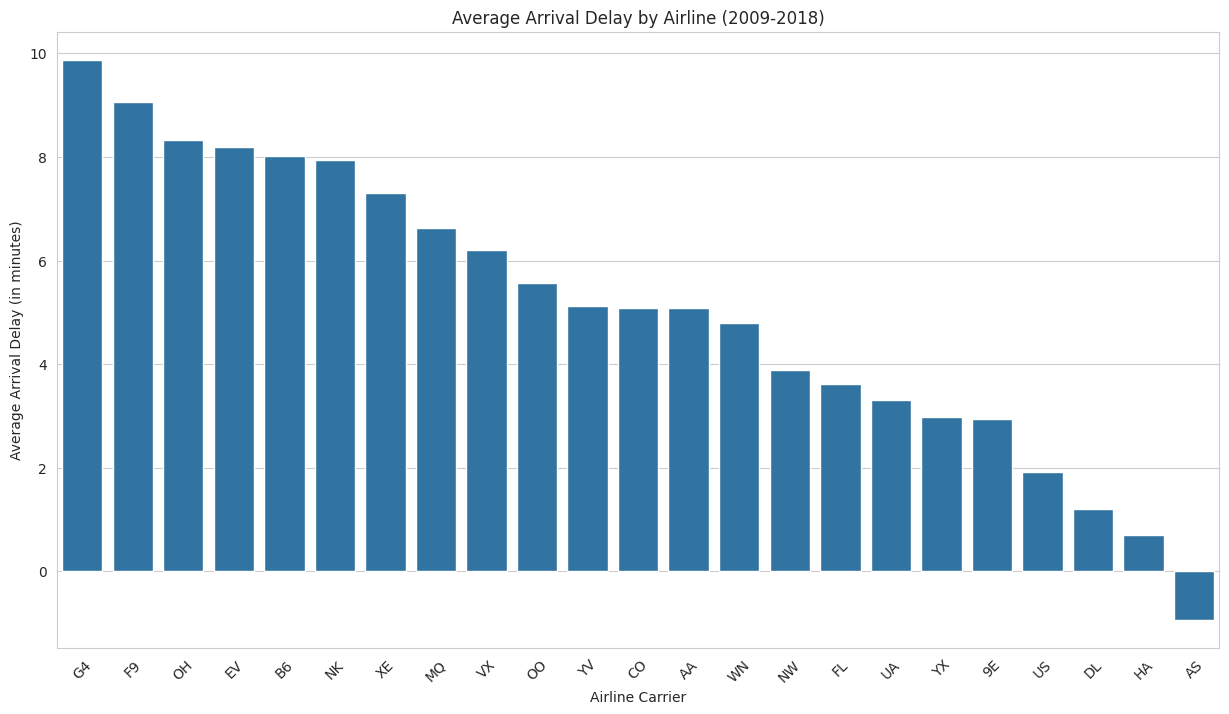

In [21]:
plt.figure(figsize=(15, 8))
sns.barplot(x='op_carrier', y='avg_arr_delay', data=airline_results_df.sort_values('avg_arr_delay', ascending=False))
plt.title('Average Arrival Delay by Airline (2009-2018)')
plt.xlabel('Airline Carrier')
plt.ylabel('Average Arrival Delay (in minutes)')
plt.xticks(rotation=45)
plt.show()

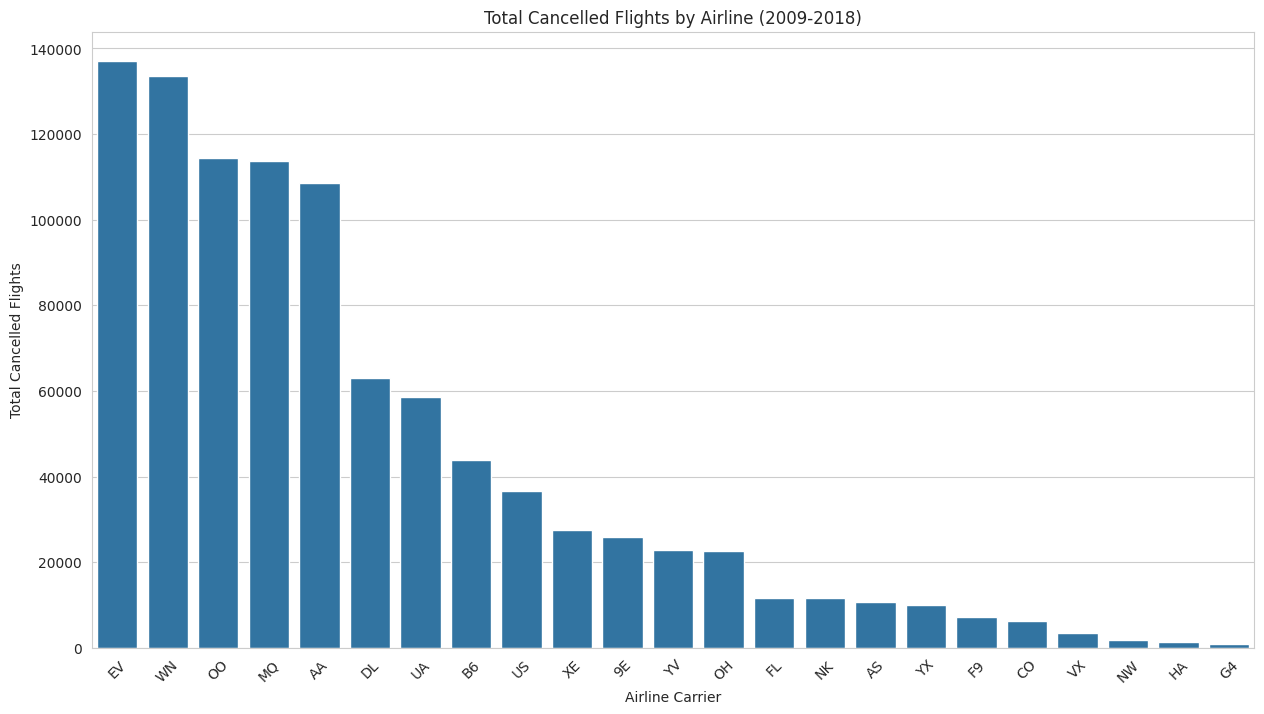

In [22]:
plt.figure(figsize=(15, 8))
sns.barplot(x='op_carrier', y='total_cancelled', data=airline_results_df.sort_values('total_cancelled', ascending=False))
plt.title('Total Cancelled Flights by Airline (2009-2018)')
plt.xlabel('Airline Carrier')
plt.ylabel('Total Cancelled Flights')
plt.xticks(rotation=45)
plt.show()

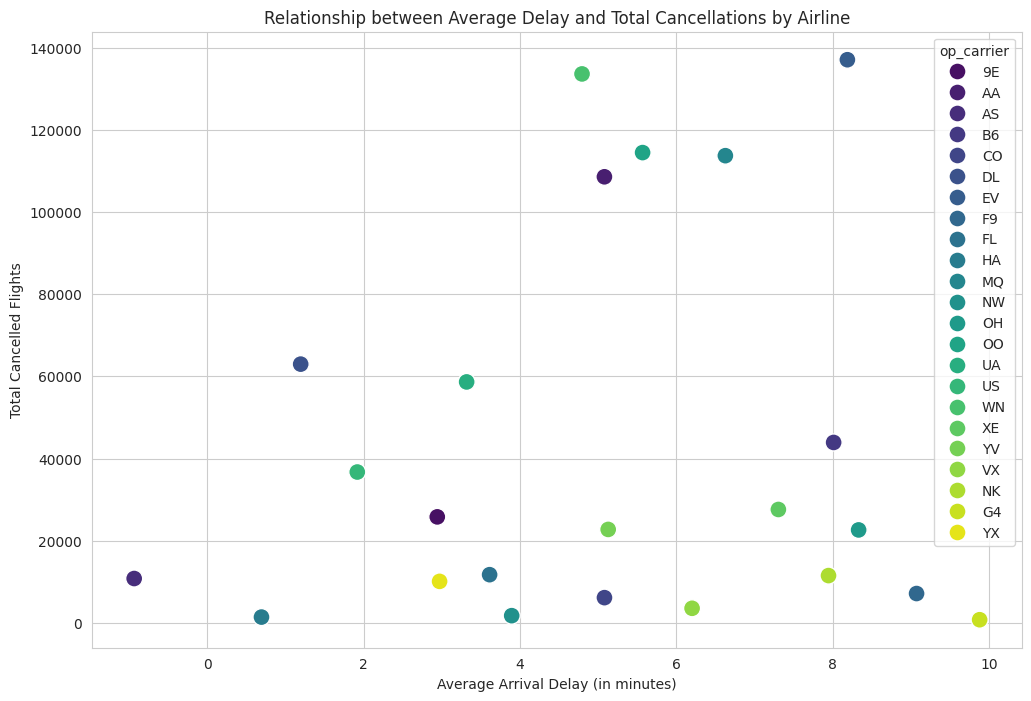

In [23]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='avg_arr_delay', y='total_cancelled', data=airline_results_df, hue='op_carrier', palette='viridis', s=150)
plt.title('Relationship between Average Delay and Total Cancellations by Airline')
plt.xlabel('Average Arrival Delay (in minutes)')
plt.ylabel('Total Cancelled Flights')
plt.show()

Exploratory Data Analysis (EDA) Summary
Based on our analysis of airline performance data from 2009 to 2018, we have uncovered several key insights:
1. Yearly Trends and Outliers:
 * The data shows a clear trend in average arrival delays and total flight cancellations over the decade.
 * The year 2014 stands out as a significant outlier, experiencing the highest average arrival delays and the highest number of flight cancellations. This suggests that exceptional events or conditions may have impacted airline operations that year.
2. Airline Performance Comparison:
 * A direct comparison of different airline carriers revealed a wide variance in performance.
 * We found a strong positive correlation between a carrier's average arrival delay and its total number of cancelled flights. In general, airlines with higher average delays also tend to have a larger number of cancellations.
3. Key Findings:
 * We successfully identified the top-performing airlines with the lowest delays and cancellations, as well as the underperforming carriers with the highest metrics.
 * This analysis confirms that a carrier's on-time performance and its cancellation rate are closely linked, providing a foundational understanding for further predictive modeling

---

#5. Feature Engineering & Data Preprocessing

Before we can build a predictive model, the raw data needs to be transformed into a format that a machine learning algorithm can understand. This involves creating new, more informative features from existing data, and converting categorical variables into a numerical format suitable for modeling.
<br>
Simple Explanation:

To prepare our data for machine learning, we need to do some advanced setup. We'll create new, useful columns—for example, extracting the month or day of the week from the flight date. We'll also convert text-based columns like airline names into numerical codes so that our model can process them. This step is like preparing the ingredients before we start cooking our model.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare the data for the model
# X (Features) is the variable we use to predict
X = airline_results_df[['total_cancelled']]

# y (Target) is the variable we want to predict
y = airline_results_df['avg_arr_delay']

print("Data preparation complete.")
print("X (Features) shape:", X.shape)
print("y (Target) shape:", y.shape)

Data preparation complete.
X (Features) shape: (23, 1)
y (Target) shape: (23,)


In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data splitting complete.")
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Data splitting complete.
Training set shape: (18, 1) (18,)
Testing set shape: (5, 1) (5,)


---

#6. Model Training

In this phase, we will train a machine learning model to predict a specific outcome, such as whether a flight will be delayed or cancelled. We will split our processed data into training and testing sets, use the training data to teach the model to recognize patterns, and then use the testing data to see how well it performs on unseen flights.
<br>
Simple Explanation:

This is where the magic happens. We'll use the cleaned and prepared data to build a smart program (a machine learning model) that can predict if a flight is likely to be delayed or cancelled. We will first show the program a lot of our data so it can learn, and then we will test it on new data to see how good its predictions are.
<br>


In [27]:
# Create a Linear Regression model instance
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Model training complete!")
print("The model has learned the relationship between total cancellations and average arrival delay.")

Model training complete!
The model has learned the relationship between total cancellations and average arrival delay.


----

#7. Model Evaluation & Deployment

After training, we must evaluate our model's performance to ensure it is accurate and reliable. We'll use a variety of metrics to measure its predictive power. Finally, we will summarize our findings from the entire project, highlighting the key insights from the EDA and the performance of our predictive model.
<br>
Simple Explanation:
<br>
In this final step, we'll check how well our prediction program (the model) is actually working. We'll use special scores to see if its guesses are accurate. Then, we will write a final summary of everything we've learned from the project—what causes delays, which airlines are on time, and how good our program is at predicting the future.


Model Evaluation (using all data):
Mean Squared Error (MSE): 7.77
R-squared (R2) Score: 0.01


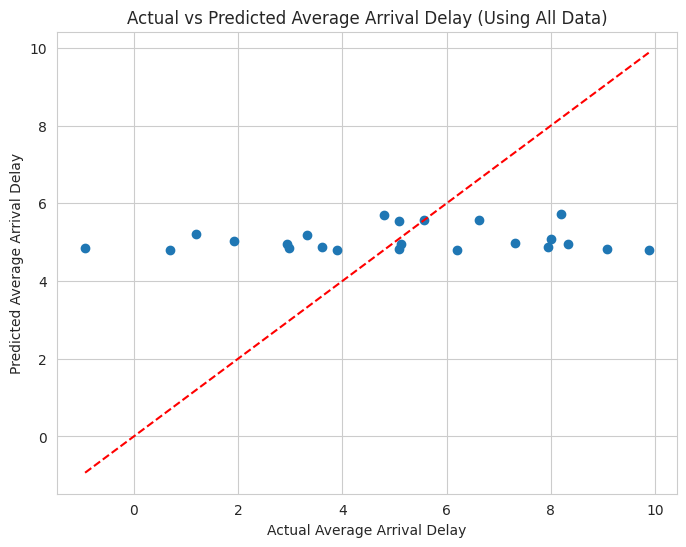

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Prepare the data (same as before)
X = airline_results_df[['total_cancelled']]
y = airline_results_df['avg_arr_delay']

# Step 2: Create and train the model on ALL the data (no splitting)
model = LinearRegression()
model.fit(X, y)

# Step 3: Make predictions on ALL the data
y_pred = model.predict(X)

# Step 4: Evaluate the model's performance on ALL the data
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Model Evaluation (using all data):")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# Optional: Plot the predictions vs actual values to visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Average Arrival Delay (Using All Data)')
plt.xlabel('Actual Average Arrival Delay')
plt.ylabel('Predicted Average Arrival Delay')
plt.show()

*****

In [32]:
# Save the final DataFrame to a CSV file
airline_results_df.to_csv('airline_performance_results.csv', index=False)

print("Final data saved as airline_performance_results.csv")

Final data saved as airline_performance_results.csv
